# Appendix 1

### Folkert Stijnman - 10475206
### Introduction to Computational Science


In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [2]:
def sir(y, t, beta, gamma):
    S, I, R = y
    
    ds_dt = - beta * S * I
    di_dt = beta * S * I - gamma * I
    dr_dt = gamma * I
    
    return([ds_dt, di_dt, dr_dt])

Basic Reproductive Rate = 1.0


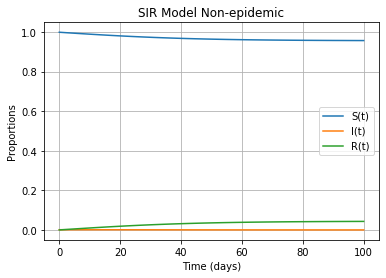

In [3]:
y = [0.999, 0.001, 0]
beta = 365/365
gamma = 7/7
print("Basic Reproductive Rate = {0}".format(beta / gamma))


t = np.linspace(0, 100, 100)

solution = scipy.integrate.odeint(sir, y, t, args=(beta,gamma))

plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR Model Non-epidemic")
plt.savefig("non-epidemic_simple.png", dpi=300)
plt.show()

Basic Reproductive Rate = 10.0


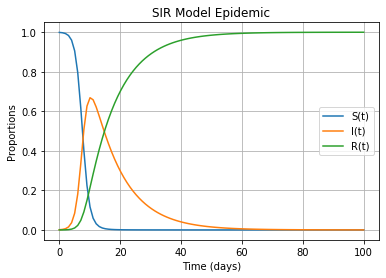

In [4]:
y = [0.999, 0.001, 0]
beta = 1
gamma = 1/10
print("Basic Reproductive Rate = {0}".format(beta / gamma))

t = np.linspace(0, 100, 100)

solution = scipy.integrate.odeint(sir, y, t, args=(beta,gamma))

plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR Model Epidemic")
plt.savefig("epidemic_simple.png", dpi=300)
plt.show()

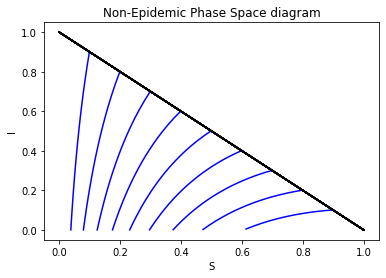

In [5]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 1
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.title("Non-Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("non-epidemic.png", dpi=300)

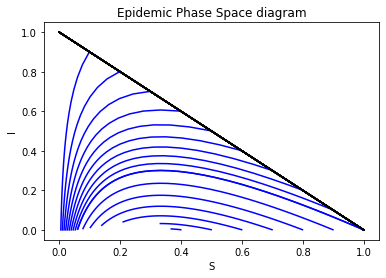

In [6]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 3
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.title("Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("epidemic.png", dpi=300)

In [7]:
from scipy.optimize import least_squares

t = np.linspace(0, 15, 15)
I_data = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

def sir_integrate(variables, t, data, y):
    return data - scipy.integrate.odeint(sir, y, t, args=(variables[0],variables[1]))[:,1]

variables = [0, 0]
start_sit = [762, 1, 0]
res_lsq = least_squares(sir_integrate, variables, args=(t, I_data, start_sit))
variables_lsq = res_lsq.x

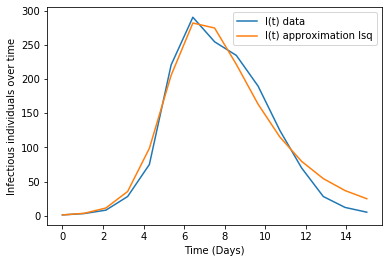

Found beta = 0.0020368392102385856 and gamma = 0.41776934364074053


In [8]:
solution = scipy.integrate.odeint(sir, start_sit, t, args=(variables_lsq[0],variables_lsq[1]))

t = np.linspace(0, 15, 15)
I_data = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

plt.plot(t, I_data, label="I(t) data")
plt.plot(t, solution[:, 1], label="I(t) approximation lsq")

plt.legend(loc=1)
plt.xlabel("Time (Days)")
plt.ylabel("Infectious individuals over time")
plt.savefig("boardingfit.png", dpi=300)
plt.show()
print("Found beta = {0} and gamma = {1}".format(variables_lsq[0], variables_lsq[1]))

0.03


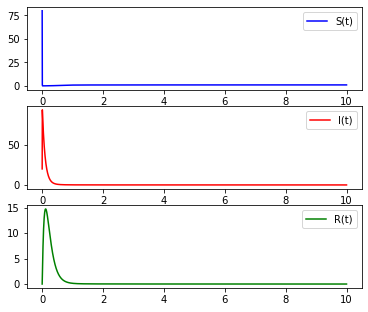

[[ 1.82282831e+00 -5.80366720e-03]
 [-5.80366720e-03  4.36882530e+01]]


In [15]:
def sir_demography(y, t, mu, beta, gamma):
    S, I, R = y
    
    ds_dt = mu - (beta * S * I) - (mu * S)
    di_dt = (beta * S * I) - (gamma * I) - (mu * I)
    dr_dt = (gamma * I) - (mu * R)
    
    return([ds_dt, di_dt, dr_dt])

t = np.linspace(0, 10*365, 10*365)

beta = 520/365
gamma = 1/7
mu = 1/(60*365)
R_0 = beta / (gamma + mu)
S0 = 0.1
I0 = 1e-4
R0 = 0

# beta = 0.03
# gamma = 1 / 100.0
# mu = 0.02
# S0 = 80.0
# I0= 20.0
# R0 = 0

y = [S0, I0, R0]


solution = scipy.integrate.odeint(sir_demography, y, t, args=(mu, beta, gamma))

plt.subplots_adjust(top = 1.1)
plt.subplot(311)
plt.plot(t/365, solution[:,0], label="S(t)", color='b')
plt.legend()
plt.subplot(312)
plt.plot(t/365, solution[:,1], label="I(t)", color='r')
plt.legend()
plt.subplot(313)
plt.plot(t/365, solution[:,2], label="R(t)", color='g')
plt.legend()


plt.savefig("endemic_simple.png", dpi=300)
plt.show()

print(np.cov(solution[:,0], solution[:,1]))

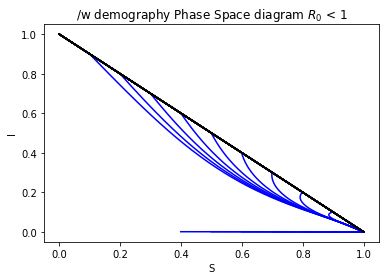

In [10]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

t = np.linspace(0, 60*365, 60*365)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir_demography, [S[j], I[i], R_0], t, args=(mu, beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.title("/w demography Phase Space diagram $R_0$ < 1")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("epidemic3.png", dpi=300)

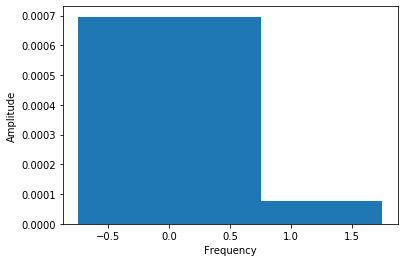

In [11]:
fft = np.fft.fft(solution[:,1])
T = t[1] - t[0]  # sampling interval 
N = solution[:,1].size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.bar(f[:N], np.abs(fft)[:N] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.savefig("ampli_vs_freq.png", dpi=300)
plt.show()